In [1]:
import cv2
import matplotlib.pyplot as plt

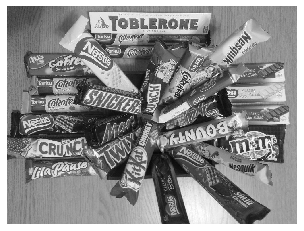

In [2]:
chos = cv2.imread("data/chocolates.jpg", 0)

plt.figure(), plt.imshow(chos, cmap="gray"), plt.axis("off");

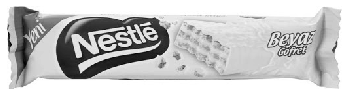

In [3]:
cho = cv2.imread("data/nestle.jpg", 0)

plt.figure(), plt.imshow(cho, cmap="gray"), plt.axis("off");

# ORB Detector

##### Features like Edge, Corner etc. of object

In [4]:
orb = cv2.ORB_create()

# key point detect | (des = descriptors)
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

# Brute-Force Matcher

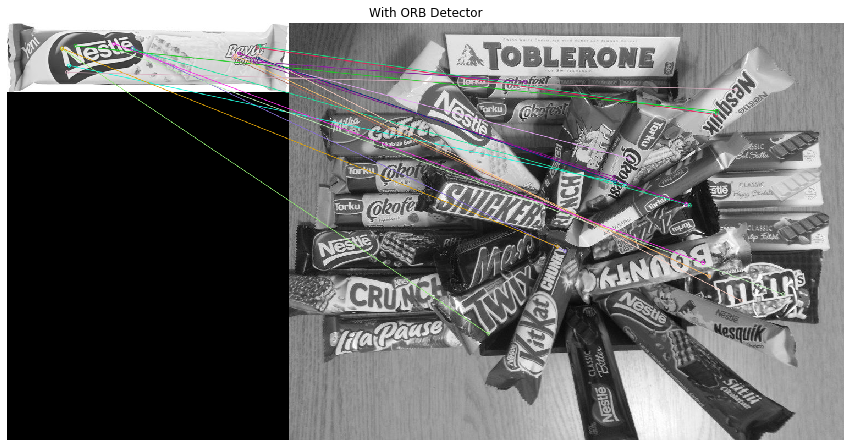

In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# match points
matches = bf.match(des1, des2)

# sort by distance
matches = sorted(matches, key=lambda x: x.distance)

# visualize by matched images
plt.figure(figsize=(15,15))
img_match = cv2.drawMatches(cho,kp1, chos,kp2, matches[:20], None, flags=2)
plt.title("With ORB Detector"), plt.imshow(img_match), plt.axis("off");

### ORB Detector doesn't work well

# SIFT Detector

### pip install opencv-contrib-python --user

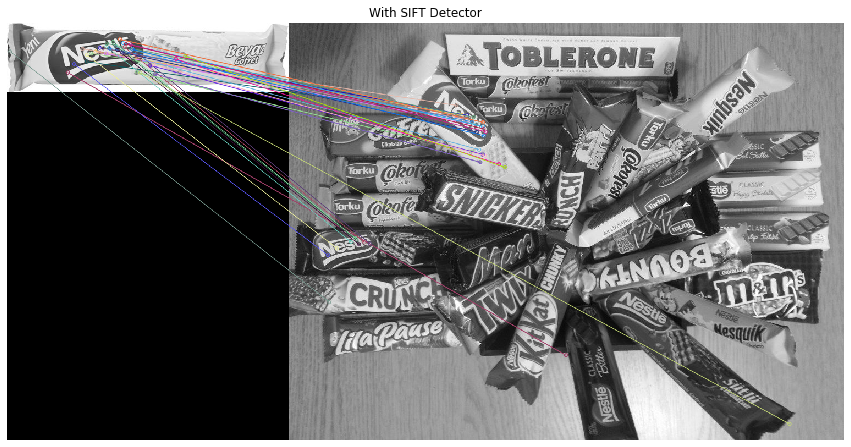

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

# Brute Force
bf = cv2.BFMatcher()

# key points detection with SIFT
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k=2)

matched_well = []

for match1, match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        matched_well.append([match1])
        
plt.figure(figsize=(15,15))
sift_matches = cv2.drawMatchesKnn(img1=cho, keypoints1=kp1, img2=chos, keypoints2=kp2, matches1to2=matched_well, outImg=None, flags=2)
plt.title("With SIFT Detector"), plt.imshow(sift_matches), plt.axis("off");